# Naive Bayes Classifier

### Introduction

We've now learned about naive bayes, and how it allows us to calculte the probability of an event occurring.  The key point is to incorporate our "prior", or the probability of an event occurring in general with the incorporation of new evidence.

$P(H|E): \frac{P(H)*P(E|H)}{P(EH) + P(EH^c)} = \frac{P(H)*P(E|H)}{P(H)*P(E|H) + P(H^c)*P(E|H^c)} $

In this lesson, we'll explicitly see how we can use the bayes formula can be used to classify different observations.

### Considering the Evidence

For this lesson, let's work with the iris dataset.  With the iris dataset consists of observations regarding different types of iris plants.  An iris, apparently, is a kind of flower.

<img src="./iris.png" width="40%">

Our task will be to classify the flowers as Versicolor, Setosa, or Virginica.  

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

X = pd.DataFrame(iris.data[:, :2], columns = iris['feature_names'][:2])  # we only take the first two features.
y = pd.Series(iris.target)

The target is represented by numbers ranging from 0 to 2, and we'll use the features of sepal length and sepal width to characterize our flowers.  

> Refer to the image above to see what a Sepal is.

In [3]:
X[:4]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [11]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Applying naive bayes

Now let's think about how we can apply our bayes formula to classify our first observation as Setosa or not.

In [13]:
X[:1]

,sepal length (cm),sepal width (cm)
0,5.1,3.5


Remember that our formula is the following:

$P(H|E): \frac{P(H)*P(E|H)}{P(EH) + P(EH^c)} = \frac{P(H)*P(E|H)}{P(H)*P(E|H) + P(H^c)*P(E|H^c)} $

We use bayes by calculating the probability that the hypothesis occurs in general, multiplied by the probability that we see the evidence assuming the hypothesis is true.

So here, let's say that we want to calculate the probability that a flower is of type Setosa (represented by 0), and let's only use the feature Sepal length to predict the probability that it's of type Setosa.

The main items that we will need to calculate are in the numerator:

* The prior: $P(H)$
* The likelihood: $P(E|H)$

1. The **prior** is just the probability of Setosas in general

In [12]:
(y == 0).mean()

0.3333333333333333

> Let's ignore that this is not a random sample of the data.

2. The **likelihood**, $P(E|H)$, is assuming the hypothesis, what is the probability of seeing the evidence.

So to calculate this, we just select those observations where the hypothesis is true, and then calculate the probability of seeing this evidence given we are looking at Setosas.  

> First we select all the setosas.

In [19]:
setosa_df = X.loc[y[y == 0].index]

Then we caculate the probabilities of a setosa having a sepal length of around $5.1$.  
> We'll update our procedure for doing this shortly, but for now seeing the number of setosas in that range works fine.

In [26]:
((setosa_df.iloc[:, 0] < 5.2) & (setosa_df.iloc[:, 0] > 4.9)).mean()

0.32

Now going back to our formula, we see that we now have enough information to calculate the numerator.

$P(H|E): \frac{P(H)*P(E|H)}{P(EH) + P(EH^c)} = \frac{P(H)*P(E|H)}{P(H)*P(E|H) + P(H^c)*P(E|H^c)} $

In [27]:
P_h = .33 
P_e_h = .32

P_h*P_e_h

0.10560000000000001

Finally, let's calculate the denominator.  Notice that our missing piece is calculating $P(H^c)*P(E|H^c)$.

$P(H^c) = 1 - P(H) = 1 - .33 = .67$

And we can  use the same technique we saw above to find $P(E|H^c)$:

In [28]:
not_setosa_df = X.loc[y[y != 0].index]
((not_setosa_df.iloc[:, 0] < 5.2) & (not_setosa_df.iloc[:, 0] > 4.9)).mean()

0.03

So now we have:

$P(H|E): \frac{P(H)*P(E|H)}{P(EH) + P(EH^c)} = \frac{P(H)*P(E|H)}{P(H)*P(E|H) + P(H^c)*P(E|H^c)} $

In [29]:
P_hc = .67
P_e_hc = .03

In [30]:
P_h*P_e_h/(P_h*P_e_h + P_hc*P_e_hc)

0.8400954653937948

So we find the probability that it is Setosa is .84.

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
gnb = GaussianNB()
y_pred = gnb.fit(X[:, :1], y).predict_proba(X[:1, :1])

In [46]:
y_pred

array([[0.8190698 , 0.15212273, 0.02880746]])

### Updating the Likelihood

Now so far, we have calculated the likelihood of seeing certain evidence simply by selecting data that matches the hypothesis, and then seeing the amount of time it within a range of our feature value.  Instead we can calculate the likelihood of seeing the evidence, by fitting a distribution to the data, and then calculating the probability of seeing our feature value, considering the distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e260e10>]],
      dtype=object)

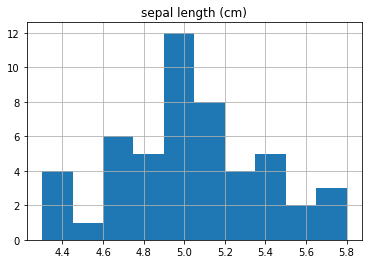

In [47]:
setosa_df.hist('sepal length (cm)')

In [49]:
setosa_df.describe().loc[['mean', 'std']]

,sepal length (cm),sepal width (cm)
mean,5.00600,3.428000
std,0.35249,0.379064


In [79]:
not_setosa_df.describe().loc[['mean', 'std']]

,sepal length (cm),sepal width (cm)
mean,6.262000,2.872000
std,0.662834,0.332751


In [78]:
import scipy.stats
scipy.stats.norm(5.1, .35).pdf(5.1)

1.1398350868612364

In [80]:
import scipy.stats
scipy.stats.norm(6.262000, .66).pdf(5.1)

0.12831206946591037

In [83]:
P_e_h = 1.1398350868612364
P_e_hc = 0.12831206946591037
P_h = .33
P_hc = .67

P_h*P_e_h/(P_h*P_e_h + P_hc*P_e_hc)

0.8139658984772351

In [84]:
y_pred

array([[0.8190698 , 0.15212273, 0.02880746]])

In [ ]:
Let's say that the probability of seeing 

In [40]:
setosa_df.describe().loc[['mean', 'std']]

,sepal length (cm),sepal width (cm)
mean,5.00600,3.428000
std,0.35249,0.379064


In [59]:
calculate_probability(5.1000, 5.006, .35249)

1.092246866224093

1. Calculate the base rate

In [8]:
y.value_counts()

2    50
1    50
0    50
dtype: int64

* Separate by class

In [10]:
combined_df = X.assign(y = y)

In [9]:
list(range(0, 3))

[0, 1, 2]

In [11]:
datasets = {}
for i in range(0, 3):
    datasets[i] = combined_df[combined_df['y'] == i] 

In [13]:
# datasets[0]

2. Calculate summary statistics of each column, separated by class.

In [23]:
datasets[0].describe().loc[['mean', 'std'], X.columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386


In [24]:
datasets[1].describe().loc[['mean', 'std'], X.columns]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753


In [25]:
datasets[2].describe().loc[['mean', 'std'], X.columns]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465


### Probabilities

In [26]:
from math import sqrt
from math import pi
from math import exp
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [29]:
calculate_probability(1, 1, 1)
calculate_probability(2, 1, 1)
calculate_probability(0, 1, 1)

0.24197072451914337

### Calculate Probabilities for new data

$P(class|data) = P(X|class) * P(class)$

> The calculation for the class that results in the largest value is taken as the prediction. 

The calculation of the probability that a row belongs to the first class 0 can be calculated as:

$P(class=0|X1,X2) = P(X1|class=0) * P(X2|class=0) * P(class=0)$

In [30]:
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, count = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

In [31]:
dataset = [[3.393533211,2.331273381,0],
[3.110073483,1.781539638,0],
[1.343808831,3.368360954,0],
[3.582294042,4.67917911,0],
[2.280362439,2.866990263,0],
[7.423436942,4.696522875,1],
[5.745051997,3.533989803,1],
[9.172168622,2.511101045,1],
[7.792783481,3.424088941,1],
[7.939820817,0.791637231,1]]

In [35]:
sample_data = pd.DataFrame(dataset, columns = ['sepal length', 'sepal width', 'y'])
sample_data

,sepal length,sepal width,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


In [36]:
datasets = {}
for i in range(0, 3):
    datasets[i] = sample_data[sample_data['y'] == i] 

In [42]:
datasets[0].describe().loc[['mean', 'std']]

,sepal length,sepal width,y
mean,2.742014,3.005469,0.0
std,0.926568,1.107330,0.0


In [38]:
sample_data['y'].mean() 

0.5

In [43]:
calculate_probability(3.393533, 2.742014, 0.926568)

0.3362559307966038

In [46]:
calculate_probability(2.331273, 3.005469, 1.107330)

0.2993210971590595

In [47]:
0.3362559307966038* 0.2993210971590595*.5
# correct 

0.050324247066140124

In [48]:
datasets[1].describe().loc[['mean', 'std']]

,sepal length,sepal width,y
mean,7.614652,2.991468,1.0
std,1.234432,1.454193,0.0


In [54]:
calculate_probability(3.393533, 7.614652, 1.234432)
calculate_probability(2.331273, 2.991468, 1.454193)

0.24747518886532732

In [55]:
0.0009340497916786564*0.24747518886532732*.5

0.00011557707430264757

$P(class=0|X1,X2) = P(X1|class=0) * P(X2|class=0) * P(class=0)$

In [ ]:
# [3.393533211,2.331273381,0]
{0: 0.05032427673372075, 1: 0.00011557718379945765}

To normalize:

In [57]:
0.24747518886532732/(0.00011557707430264757 + 0.24747518886532732)

0.9995331931145977

In [58]:
0.00011557707430264757/(0.00011557707430264757 + 0.24747518886532732)

0.0004668068854022961

### Resources

[Machine learning mastery](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)